In [20]:
library(glue)

The following objects are masked from salaries (pos = 3):

    Salary, YearsExperience




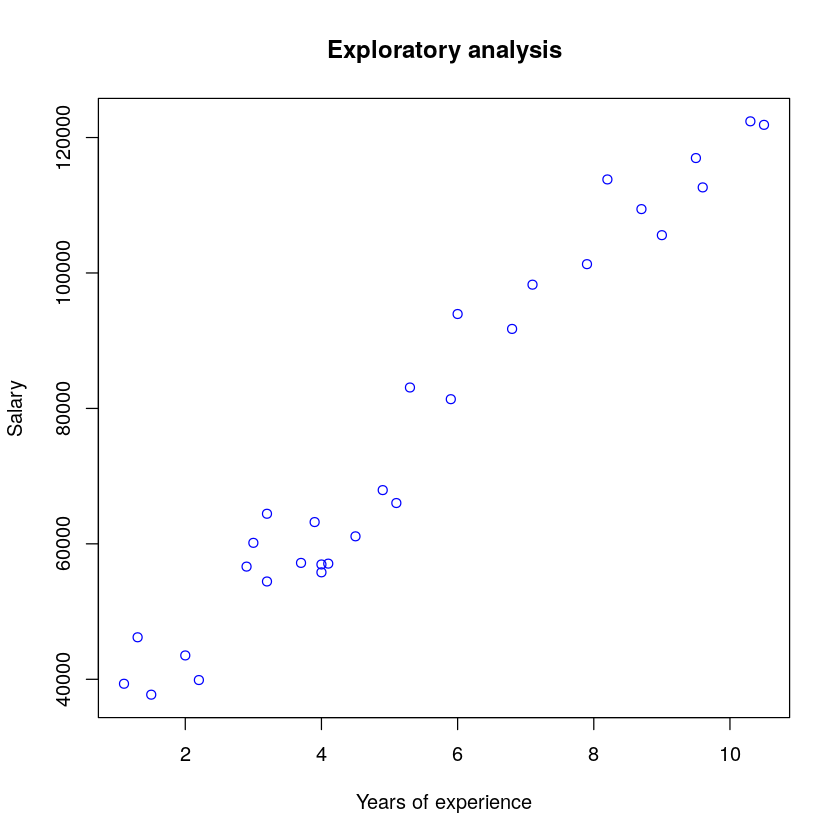

In [2]:
data_loader <- function(file_path,separator){
  
  data =  read.table(file_path,header = TRUE,sep=separator)
  return(data)
}


salaries =  data_loader("data_salaries.csv",",")

attach(salaries)
plot(salaries$YearsExperience,salaries$Salary,main = "Exploratory analysis",xlab = "Years of experience",
     ylab = "Salary", col="blue"
     )

correlation  <- function(x,y){
  x_bar =   sum(x)/ length(x)
  y_bar =  sum(y)/length(y)
  x_var =  sum((x - x_bar)^2)/(length((x) - 1))
  y_var =  sum((y - y_bar)^2)/(length((y) - 1))
  covar_x_y =  sum((x - x_bar) * (y-y_bar))/ (length((y) - 1))
  
  corr =  covar_x_y/ sqrt(x_var * y_var)
  
  return(corr)
}

corr =  correlation(salaries$YearsExperience,salaries$Salary)



In [3]:
linear_regression <-function(x,y){
  x_bar =   sum(x)/ length(x)
  y_bar =  sum(y)/length(y)
  beta_1 =  sum((x - x_bar) * y)/ sum((x - x_bar)^2)
  
  beta_0 = y_bar -  beta_1 * x_bar
  return(list(beta_0,beta_1))
}

betas =  linear_regression(YearsExperience,Salary)

beta_0 = betas[[1]]

beta_1 = betas[[2]]


regressor <- function(x,beta_0,beta_1){
  return(beta_0 + beta_1 * x)
}


# 
# plot(YearsExperience,res)


[1] 129741.8


In [6]:
x = salaries$YearsExperience
y = salaries$Salary
n =  length(x)
x_bar =  sum(x)/n
y_bar =  sum(y)

#standard deviation of our data
sigma_hat = sqrt(sum((y - beta_0 -  beta_1*x)^2)/(n-2))

print(sigma_hat)

[1] 5788.315


In [30]:
var_beta_1 =  sigma_hat^2 /sum((x - x_bar)^2)


var_beta_0 =  (sum(x^2)/(n * sum(x - x_bar)^2)) * sigma_hat^2 
var_beta_0

[1] 4178813

In [34]:
cov_beta0_beta1 =  ((-x_bar *sigma_hat^2) /(n * sum(x - x_bar)^2)) * sigma_hat^2 
cov_beta0_beta1

cov_matrix_beta = matrix(c(var_beta_0,cov_beta0_beta1,cov_beta0_beta1,var_beta_1),ncol=2,byrow=TRUE)
cov_matrix_beta

[1] -6.148071e+12

4.178813e+06,-6.148071e+12
-6.148071e+12,1.036069e+06


In [25]:
x_new <- 11
y_new = regressor(x,beta_0,beta_1)

res =  regressor(YearsExperience,beta_0,beta_1)

In [26]:
print(glue("Expected salaray after 11 years  ${round(y_new)}"))

Expected salaray after 11 years  $129742


In [31]:
var_y_new <-  var_beta_0 + x_new^2 * var_beta_1 + 2 * x_new * cov_beta0_beta1

In [32]:
var_y_new

[1] 125506204